In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [52]:
wavelength = 0.635/3.4 #in um
groovewidth = 9.95 #in um
groovespacing = 27.36 #in um .....27.36
beamwidth = 2500 #in um. 2000um = 2mm
inputangle = 71.56 #in degrees
inputangle = inputangle*np.pi/180 #in rad

# blazeangle_d = 71.56 #in degrees
# blazeangle = blazeangle_d*np.pi/180 #in rad

outputangle_deg = np.linspace(-90,90,500000)
outputangle_rad = outputangle_deg*np.pi/180

In [53]:
###Start by setting up array of all orders m
m_vector = np.arange(-70, 70, 1)
# m_vector.shape

###Now, calulate the diffraction angle for each order
diffraction_centers = np.arcsin(np.sin(inputangle)+3.4*(m_vector*wavelength/groovespacing))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arcsin
  


In [54]:
###Make a mask to get rid of NaNs aka where the grating no longer reflects orders at the far wings
mask = np.isfinite(diffraction_centers)

###Apply mask to orders array and corresponding diffracted angle array:
m_vector = m_vector[mask]
diffraction_centers = diffraction_centers[mask]

###Broadcast diffracted angle array to a column (transpose):
diffraction_column_vector = np.expand_dims(diffraction_centers, 1)

In [55]:
#argument for beam diffraction sinc function:
argBD = (beamwidth*np.pi/wavelength)*np.sin(outputangle_rad-diffraction_column_vector)
#Sinc function then is:
BeamDiffraction = (np.sin(argBD)/argBD)**2

n_orders = len(m_vector)


(65, 85)

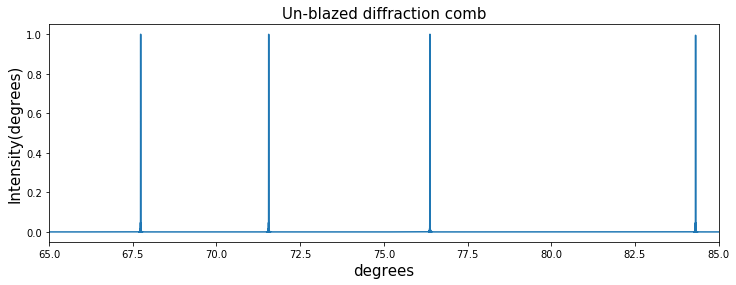

In [56]:
### Plot all the orders (the comb) in unblazed diffraction:
total_unblazed_diffraction = BeamDiffraction.sum(0) ######not sure what is happening here

# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

plt.figure(figsize=(12, 4))
plt.plot(outputangle_rad*180/math.pi,total_unblazed_diffraction);
plt.xlabel('degrees',fontsize = 15)
plt.title('Un-blazed diffraction comb',fontsize = 15)
plt.ylabel('Intensity(degrees)',fontsize = 15)
# plt.plot(outputangle_rad*180/math.pi,BlazeEnvelope); ##may need to run whole code before this line is plottable
#plt.title('beam diffraction for m ={}'.format(m))
# plt.xlim(0,3)
# plt.xlim(65,80)
plt.xlim(65,85)


### Now add blaze and multiply comb by blaze envelope

In [61]:
###To make discrepancy easier to calculate:
# blazeangle_expected = 71.56

blazeangle_d = np.linspace(71.56, 72.56, 8)
blazeangle = blazeangle_d*np.pi/180 #in rad


In [62]:
argBE_master = []
BlazeEnvelope_master = []
total_blazed_diffraction_master =[]

for i in blazeangle:
    
    ###arg for blaze envelope sinc function:
    argBE = (groovewidth*np.pi/wavelength)*np.sin(outputangle_rad-i)
    argBE_master.append(argBE)
    
    ###sinc function to describe the blaze envelope:
    BlazeEnvelope = (np.sin(argBE)/argBE)**2
    BlazeEnvelope_master.append(BlazeEnvelope)
    
    
    ###multiply together
    total_blazed_diffraction = total_unblazed_diffraction * BlazeEnvelope
    total_blazed_diffraction_master.append(total_blazed_diffraction)

In [59]:
######plot just one of the plots:
# plt.figure(figsize=(20, 7))
# plt.plot(outputangle_rad*180/math.pi,total_blazed_diffraction);
# plt.plot(outputangle_rad*180/math.pi,BlazeEnvelope);
# plt.xlabel('degrees')
# plt.grid(linestyle='-', linewidth=1)
# #plt.title('beam diffraction for m ={}'.format(m))
# plt.xlim(60,80)

## as blaze enevlope moves, it decreases the light in the blazed order

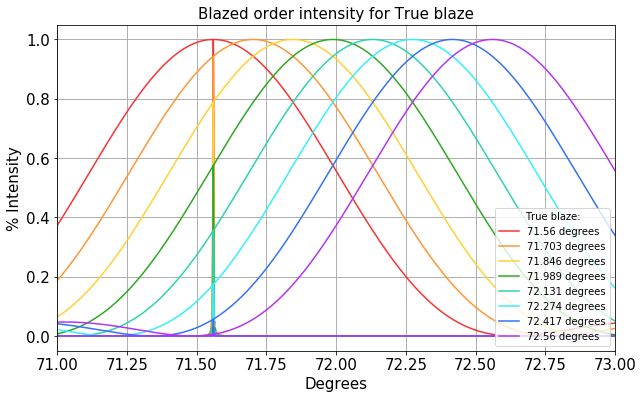

In [63]:
#####Plots all, probably don't want unless for texting a few
int=0
colors = ['#F73333','#FF9633','#FFD133','#2CA822','#2AD4AD','#33F1F7','#3371F7','#B333F7', '#F433F7', '#F7338F'] #https://htmlcolorcodes.com/ for more colors!!!
plt.figure(figsize=(10, 6))
for i,j in zip(total_blazed_diffraction_master,BlazeEnvelope_master):
    plt.plot(outputangle_rad*180/math.pi,i,label ='{} degrees'.format(round(blazeangle_d[int],3)), c = colors[int]);
#     plt.plot(outputangle_rad*180/math.pi,j,label ='blaze envelope for blaze:{}'.format(blazeangle_d[int]),c = colors[int]);
    plt.plot(outputangle_rad*180/math.pi,j,c = colors[int]);
    plt.xlabel('Degrees', size = 15)
    plt.ylabel('% Intensity', size = 15)
    plt.grid(linestyle='-', linewidth=1)
#     plt.legend(loc='upper right')
    plt.legend(loc='lower right',title = 'True blaze:')
#     plt.legend(bbox_to_anchor=(1.15, 0.5),title = 'blazed order intensity '+'\n'+'for true blaze of:')
    plt.title('Blazed order intensity for True blaze', size = 15)# {}'.format(blazeangle_d[int]))
    int = int+1
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.xlim(71,73)
#     plt.axvline(71.5)
#     plt.axvline(72.6)

## ...and same plot but diff axes bounds:

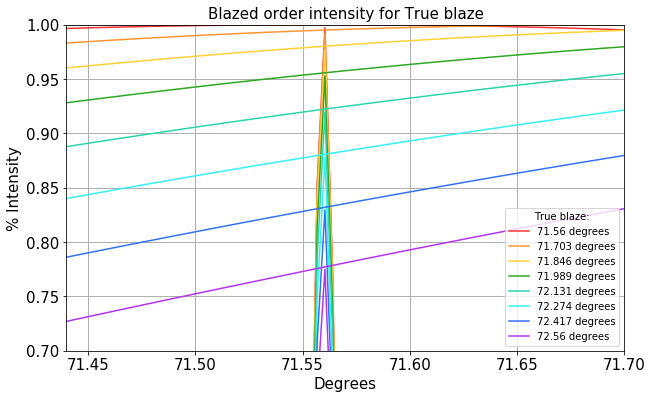

In [25]:
#####Plots all, probably don't want unless for texting a few
int=0
colors = ['#F73333','#FF9633','#FFD133','#2CA822','#2AD4AD','#33F1F7','#3371F7','#B333F7', '#F433F7', '#F7338F'] #https://htmlcolorcodes.com/ for more colors!!!
plt.figure(figsize=(10, 6))

for i,j in zip(total_blazed_diffraction_master,BlazeEnvelope_master):
    plt.plot(outputangle_rad*180/math.pi,i,label ='{} degrees'.format(round(blazeangle_d[int],3)), c = colors[int]);
#     plt.plot(outputangle_rad*180/math.pi,j,label ='blaze envelope for blaze:{}'.format(blazeangle_d[int]),c = colors[int]);
    plt.plot(outputangle_rad*180/math.pi,j,c = colors[int]);
    plt.xlabel('Degrees', size = 15)
    plt.ylabel('% Intensity', size = 15)
    plt.grid(which = 'major', axis = 'both',linestyle='-', linewidth=1)
#     plt.legend(loc='upper right')
    plt.legend(loc='lower right',title = 'True blaze:')
#     plt.legend(bbox_to_anchor=(1.15, 0.5),title = 'blazed order intensity '+'\n'+'for true blaze of:')
    plt.title('Blazed order intensity for True blaze', size = 15)# {}'.format(blazeangle_d[int]))
    int = int+1
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.xlim(71.44,71.7)
    plt.ylim(0.7,1)

### Now calculate loss as a function of blaze discrepancy

In [39]:
# ########################################### Enable in notebook zooming:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()
# ###########################################

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text yticklabel objects>)

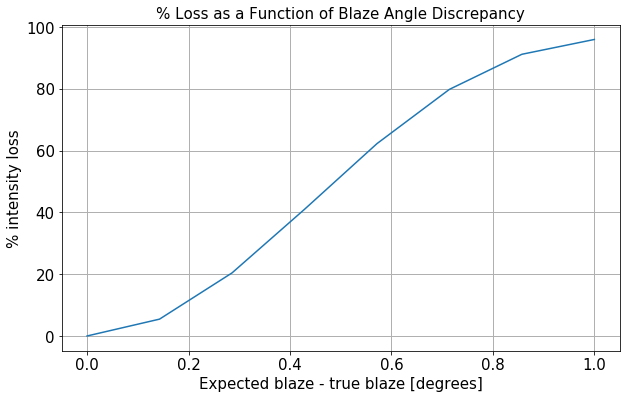

In [11]:
# expected = 
# print(total_blazed_diffraction_master[0][np.argmax(total_blazed_diffraction_master[0]]))
# print(x[np.argmax(x)])
iterator = 0
lossarray=[]
degreediff_master=[]

for x in total_blazed_diffraction_master:
    if iterator == 0:
        expected = x[np.argmax(x)]
    iterator = iterator+1
#     print(np.argmax(x))
#     print(x[np.argmax(x)])
#     print(expected, 'expected')
    loss = expected - x[np.argmax(x)]
    loss = loss*100
#     print('difference=', loss)
    lossarray.append(loss)

for z in blazeangle_d:
#     print(z)
    degreediff = z - blazeangle_d[0]
    degreediff_master.append(degreediff)
# print(lossarray)  
 

plt.figure(figsize=(10, 6))
plt.plot(degreediff_master,lossarray)#,label ='blazed diffraction');
plt.xlabel('')
# plt.axvspan(0, 0.1, color='red', alpha=0.5)
plt.grid(linestyle='-', linewidth=1)
plt.ylabel('% intensity loss',fontsize = 15)
plt.xlabel('Expected blaze - true blaze [degrees]',fontsize = 15)
# plt.legend(loc='upper right')
plt.title('% Loss as a Function of Blaze Angle Discrepancy',fontsize = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
# plt.xlim(-0.02,0.4)

In [49]:
# ###Sanity check:

# for x in BlazeEnvelope_master:
#     print('index of max blaze envelope value', np.argmax(x))
#     print('intensity at envelope max', x[np.argmax(x)])

# #this give the index and then the intensity value corresponding to that index. Turns out, this just tells us where the
# #...blaze envelope peaks and what index that correposnds to

# for xx in total_blazed_diffraction_master:
#     print('index of max intensity',np.argmax(xx))
#     print('intensity in blazed order', xx[np.argmax(xx)])
#     print('DIFFERENCE=', x[np.argmax(x)]-xx[np.argmax(xx)])
    
# ##Yep this all checks out. blaze envelope max moves to the right, stays at 99%, max order decreases, while index stays the same

Markdown and LaTeX:  $𝛼^{2}$